## Final Project Submission

Please fill out:
* Student name: Carly Tsuda
* Student pace: full time
* Scheduled project review date/time: March 22, 2021 at 10:30 AM PST
* Instructor name: Victor Geislinger (review by Lindsey Berlin)
* Blog post URL:


### Business Understanding
The key problem that I chose to focus on for this assignment was to explore real estate values in Seattle area homes, and how those home values might be influenced by renovations. 

### Data Understanding

In the following potion of this Notebook, I'm going to document some of my data exploration and thought processes, starting with the classic importing of relevent libraries, loading the csv data, and the first .head() printout.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

kc = pd.read_csv("data/kc_house_data.csv")

print(kc.info())

kc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


To get a better sense of the data's scope, I wanted to see the timeframe it represented. I learned that the data represented sales occuring in roughly a single calendar year.

In [8]:
#convert date to datetime for the sake of good practice
kc['date'] = pd.to_datetime(kc['date'])
#make sure it took
kc.info()

#print the min/max, since range doesn't like Series
print("Earliest data point: " + str(kc['date'].min()))
print("Latest data point: " + str(kc['date'].max()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     19221 non-null  float64       
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  int64         
 11  sqft_basement  21597 non-null  object        
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   21597 non-null  float64       
 14  zipcode        21597 non-null  int64         
 15  sqft_living15  2159

(array([   29.,     0.,   170.,     0.,     0., 14020.,     0.,  5677.,
            0.,  1701.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

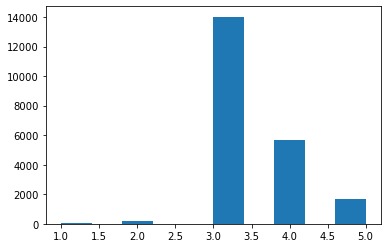

In [190]:
plt.hist(kc['condition'])

In [189]:
continuous = ['price',
              'date',
              'sqft_living',
              'sqft_lot',
              'sqft_above',
              'sqft_basement',
              'yr_built',
              'yr_renovated',
              'sqft_living15',
              'sqft_lot15']

categorical = ['bedrooms',
               'bathrooms',
               'floors',
               'waterfront',
               'view',
               'grade',
               'condition'
               #'zipcode'
              ]

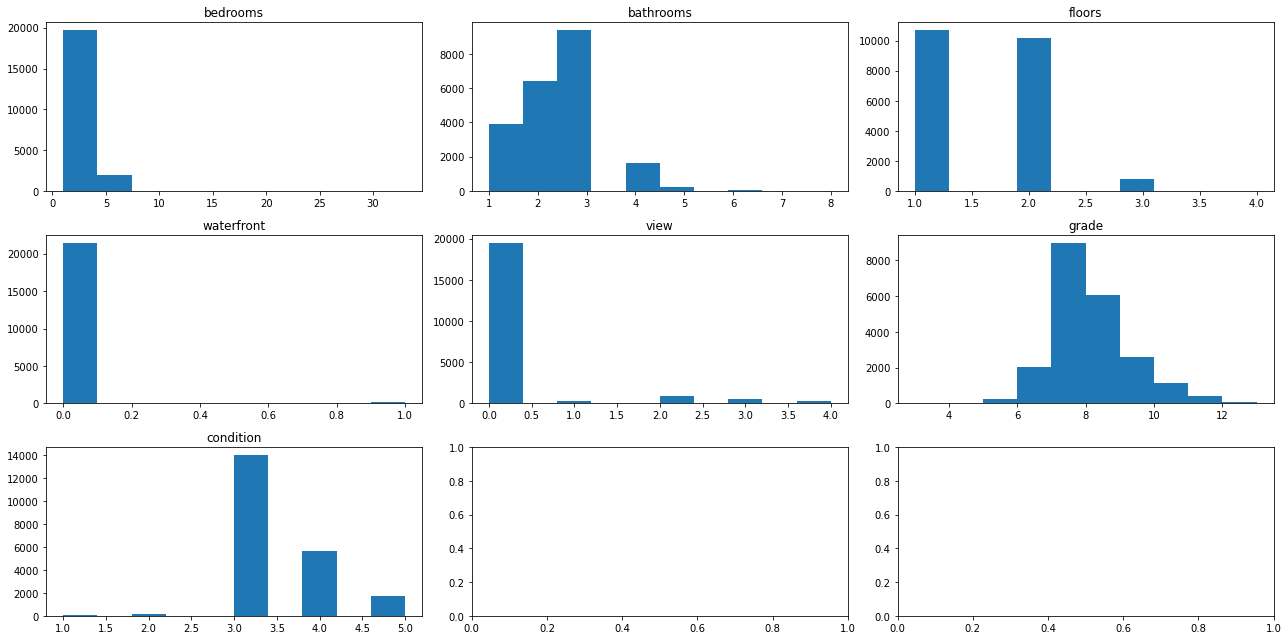

In [193]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(18, 9))

for col, ax in zip(categorical, axes.flatten()):
    ax.hist(kc[col])
    ax.set_title(col)
    
fig.tight_layout()

In the assignment description, it was suggested that there were some columns that we could delete right away for the sake of simplicity. I thought that those columns were probably not ones that I'd use, but I wanted to take a look to form my own opinion and see why I thought those variables might not be useful. 

    date
    view
    sqft_above
    sqft_basement
    yr_renovated
    zipcode
    lat
    long
    sqft_living15
    sqft_lot15

I know right away that I'm not interested in the latitude and longitude for a project of this scope. Two of the three columns ('view' and 'yr_renovated') showing missing data are on this list as well, which indicates that that data might not be particularly reliable even if cleaned. I was hesitant to remove the 'yr_renovated' column as I thought that it might be useful in my analysis, so I left it in for the time being (filling missing values with 0s). Also, without a table to merge to, I didn't see a reason to keep the ID column

In [2]:
#dropping columns that I know right away won't be useful for my analysis

kc.drop(['id', 'lat', 'long', 'view'], axis = 1, inplace = True)

70


C:\Users\carly\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\carly\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


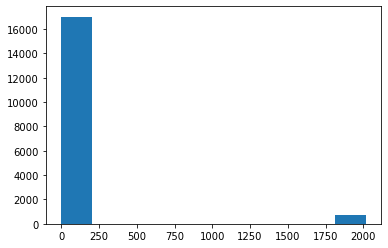

In [3]:
print(kc['yr_renovated'].nunique())

plt.hist(kc['yr_renovated'])

kc['yr_renovated'] = kc['yr_renovated'].fillna(0)

C:\Users\carly\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\carly\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


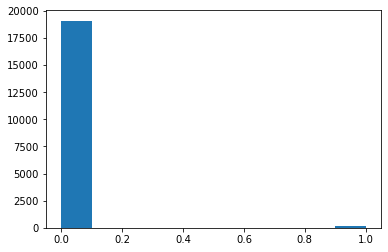

In [182]:
kc['waterfront'].unique()

plt.hist(kc['waterfront'])

kc['waterfront'] = kc['waterfront'].fillna(0)

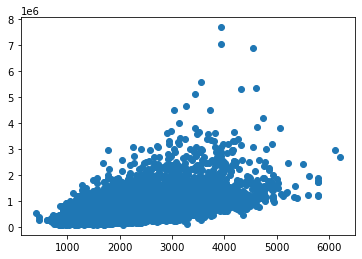

In [187]:
plt.scatter(kc['sqft_living15'], kc['price'])

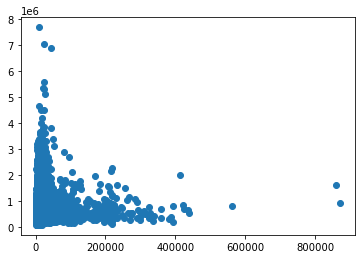

In [188]:
plt.scatter(kc['sqft_lot15'], kc['price'])

### Data Preparation

In [191]:
print('Number of Categories')
for each in categorical:
    
    print('{} : {}'.format(each, kc[each].nunique()))

Number of Categories
bedrooms : 12
bathrooms : 29
floors : 6
waterfront : 2
view : 5
grade : 11
condition : 5


In [192]:
kc['bathrooms'] = kc['bathrooms'].map(lambda x: np.ceil(x))
kc['floors'] = kc['floors'].map(lambda x: np.ceil(x))
kc['floors'].unique()

array([1., 2., 3., 4.])

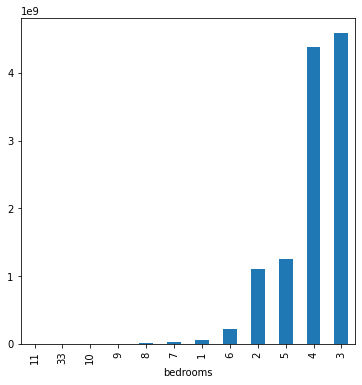

In [194]:
kc['bedrooms'].unique()

fig,ax = plt.subplots(figsize=(6,6))
kc.groupby('bedrooms').sum()['price'].sort_values().plot.bar(ax=ax)

kc['bedrooms'] = kc['bedrooms'].astype('int')
kc.loc[kc['bedrooms'] > 6, 'bed_7over'] = '1'
kc.loc[kc['bedrooms'] <= 6, 'bed_7over'] = '0'
#kc.info()

In [195]:
bed_dummies = pd.get_dummies(kc['bedrooms'], prefix='bed', drop_first=True)
bed_dummies.drop(['bed_7', 'bed_8', 'bed_9', 'bed_10', 'bed_11', 'bed_33'], axis = 1, inplace = True)
kc = pd.concat([kc, bed_dummies], axis=1)

categorical.remove('bedrooms')

kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,sqft_living15,sqft_lot15,bed_7over,bed_2,bed_3,bed_4,bed_5,bed_6
0,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0.0,0.0,3,...,0.0,98178,1340,5650,0,0,1,0,0,0
1,2014-12-09,538000.0,3,3.0,2570,7242,2.0,0.0,0.0,3,...,1991.0,98125,1690,7639,0,0,1,0,0,0
2,2015-02-25,180000.0,2,1.0,770,10000,1.0,0.0,0.0,3,...,0.0,98028,2720,8062,0,1,0,0,0,0
3,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0.0,0.0,5,...,0.0,98136,1360,5000,0,0,0,1,0,0
4,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0.0,0.0,3,...,0.0,98074,1800,7503,0,0,1,0,0,0


In [196]:
for each in categorical:
    #kc[each].cat.codes
    temp = pd.get_dummies(kc[each], prefix = each[:3], drop_first=True)
    kc.drop(each, axis = 1, inplace=True)
    kc = pd.concat([kc, temp], axis=1)
    
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int32         
 3   sqft_living    21597 non-null  int64         
 4   sqft_lot       21597 non-null  int64         
 5   sqft_above     21597 non-null  int64         
 6   sqft_basement  21597 non-null  object        
 7   yr_built       21597 non-null  int64         
 8   yr_renovated   21597 non-null  float64       
 9   zipcode        21597 non-null  int64         
 10  sqft_living15  21597 non-null  int64         
 11  sqft_lot15     21597 non-null  int64         
 12  bed_7over      21597 non-null  object        
 13  bed_2          21597 non-null  uint8         
 14  bed_3          21597 non-null  uint8         
 15  bed_4          2159

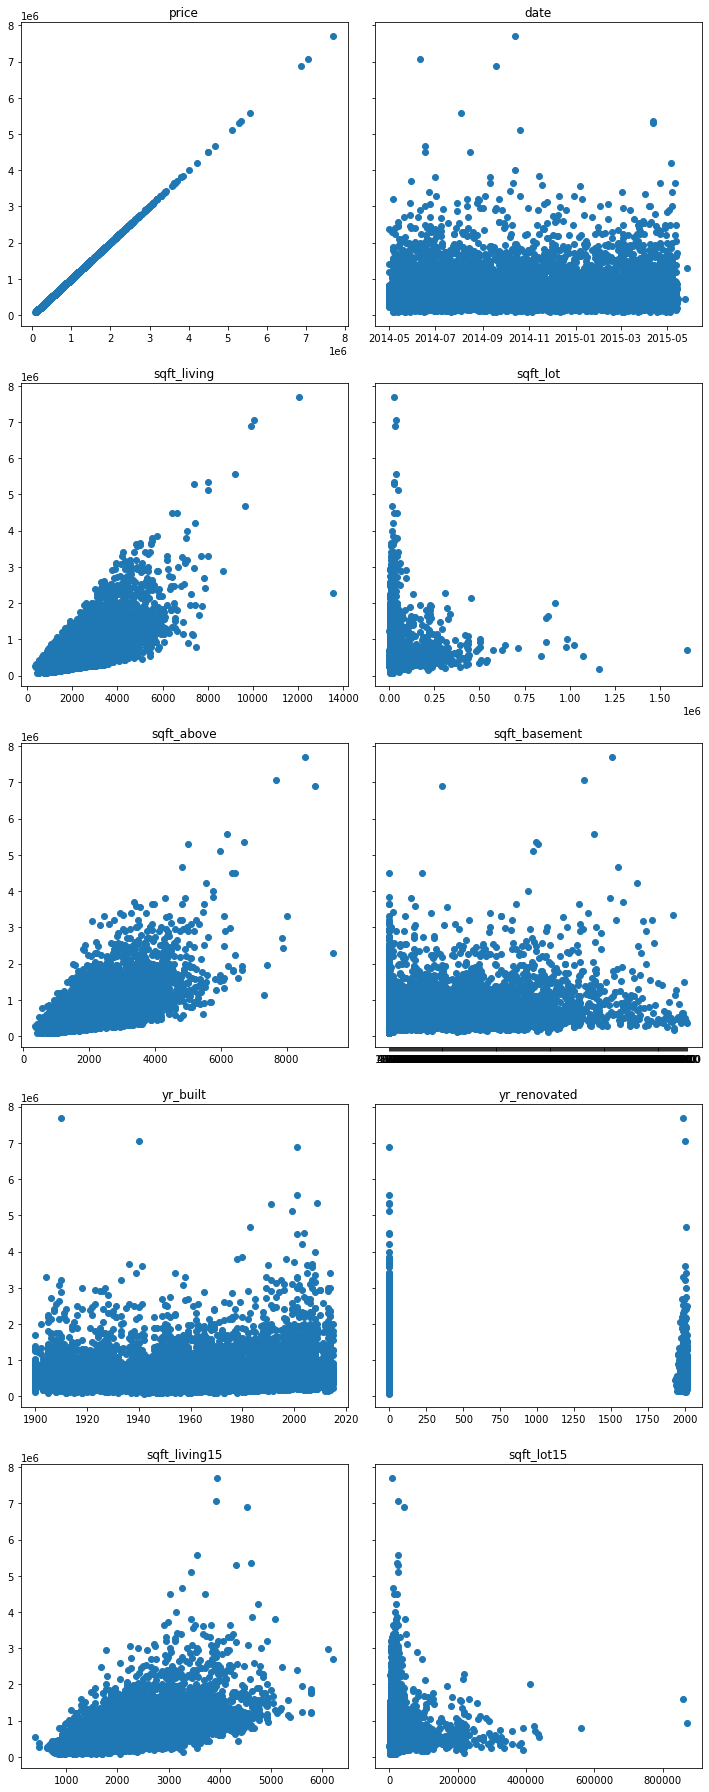

In [197]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (10, 25), sharey=True)

for col, ax in zip(continuous, axes.flatten()):
    ax.scatter(kc[col], kc['price'])
    ax.set_title(col)
    
fig.tight_layout()


Check for multicollinearity

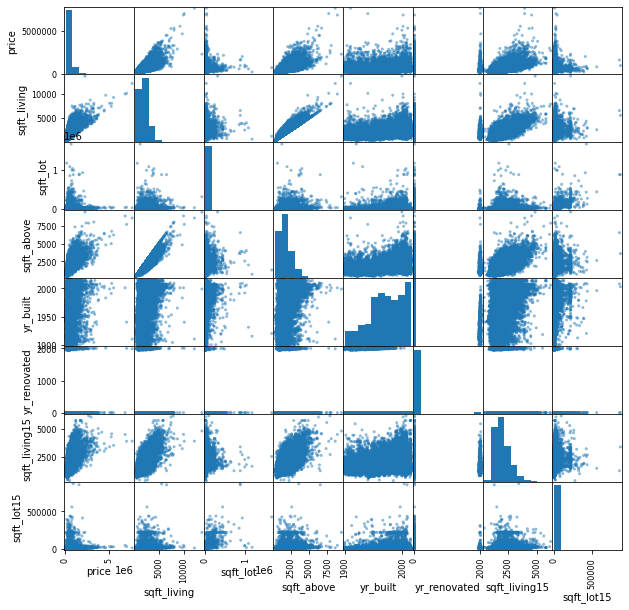

In [198]:
pd.plotting.scatter_matrix(kc[continuous], figsize=(10,10))
plt.show()

In [199]:
abs(kc.corr()) > 0.75
kc.corr()

,price,bedrooms,sqft_living,sqft_lot,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,...,gra_8,gra_9,gra_10,gra_11,gra_12,gra_13,con_2,con_3,con_4,con_5
price,1.000000,0.308787,0.701917,0.089876,0.605368,0.053953,0.117855,-0.053402,0.585241,0.082845,...,0.004576,0.235859,0.340944,0.357589,0.291068,0.211806,-0.051432,0.006948,-0.030759,0.057531
bedrooms,0.308787,1.000000,0.578212,0.032471,0.479386,0.155670,0.017900,-0.154092,0.393406,0.030690,...,0.073140,0.160294,0.135766,0.116596,0.062257,0.039026,-0.049463,0.005210,-0.009841,0.027500
sqft_living,0.701917,0.578212,1.000000,0.173453,0.876448,0.318152,0.051060,-0.199802,0.756402,0.184342,...,0.071115,0.318499,0.369228,0.345964,0.238136,0.144424,-0.063984,0.102061,-0.083850,-0.018284
sqft_lot,0.089876,0.032471,0.173453,1.000000,0.184139,0.052946,0.004979,-0.129586,0.144763,0.718204,...,-0.023923,0.049646,0.074421,0.077104,0.061699,0.007767,0.037871,-0.011589,0.013284,-0.014452
sqft_above,0.605368,0.479386,0.876448,0.184139,1.000000,0.424037,0.020645,-0.261570,0.731767,0.195077,...,0.059423,0.343388,0.376399,0.342198,0.222177,0.126666,-0.057698,0.194238,-0.142520,-0.088596
yr_built,0.053953,0.155670,0.318152,0.052946,0.424037,1.000000,-0.202555,-0.347210,0.326377,0.070777,...,0.199844,0.220104,0.148820,0.098762,0.046874,0.004692,-0.066977,0.391418,-0.257155,-0.244382
yr_renovated,0.117855,0.017900,0.051060,0.004979,0.020645,-0.202555,1.000000,0.062397,0.000683,0.004286,...,0.006465,0.016509,0.002339,-0.001403,-0.000269,0.016051,-0.008298,0.064339,-0.052031,-0.026238
zipcode,-0.053402,-0.154092,-0.199802,-0.129586,-0.261570,-0.347210,0.062397,1.000000,-0.279299,-0.147294,...,-0.052619,-0.087750,-0.073251,-0.058189,-0.039301,0.003762,0.023668,0.017704,-0.060765,0.058595
sqft_living15,0.585241,0.393406,0.756402,0.144763,0.731767,0.326377,0.000683,-0.279299,1.000000,0.183515,...,0.073372,0.339543,0.360825,0.309442,0.184882,0.072304,-0.052141,0.113671,-0.074361,-0.061473
sqft_lot15,0.082845,0.030690,0.184342,0.718204,0.195077,0.070777,0.004286,-0.147294,0.183515,1.000000,...,-0.031779,0.063191,0.074025,0.075378,0.062209,0.011492,0.022377,-0.012933,0.020645,-0.017569


In [200]:
kc.drop('sqft_above', axis=1, inplace=True)

normalize continuous variables

In [201]:
from statsmodels.formula.api import ols

outcome = 'price'
xcols = ['sqft_living', 'sqft_living15']
predictors = '+'.join(xcols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=kc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                 1.078e+04
Date:                Sat, 13 Mar 2021   Prob (F-statistic):               0.00
Time:                        01:32:18   Log-Likelihood:            -2.9991e+05
No. Observations:               21597   AIC:                         5.998e+05
Df Residuals:                   21594   BIC:                         5.999e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9.926e+04   5427.190    -18.290      0.000    -1.1e+05   -8.86e+04
sqft_living     242.4444      2.945     82.329      0.000     236.672     248.216
sqft_living15    68.0527      3.946     17.248      0.000      60.319      75.786
==============================================================================
Omnibus:                    15568.864   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           682653.257
Skew:                           2.983   Prob(JB):                         0.00
Kurtosis:                      29.889   Cond. No.                     9.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

array([[<AxesSubplot:xlabel='sqft_living', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_living15', ylabel='sqft_living'>],
       [<AxesSubplot:xlabel='sqft_living', ylabel='sqft_living15'>,
        <AxesSubplot:xlabel='sqft_living15', ylabel='sqft_living15'>]],
      dtype=object)

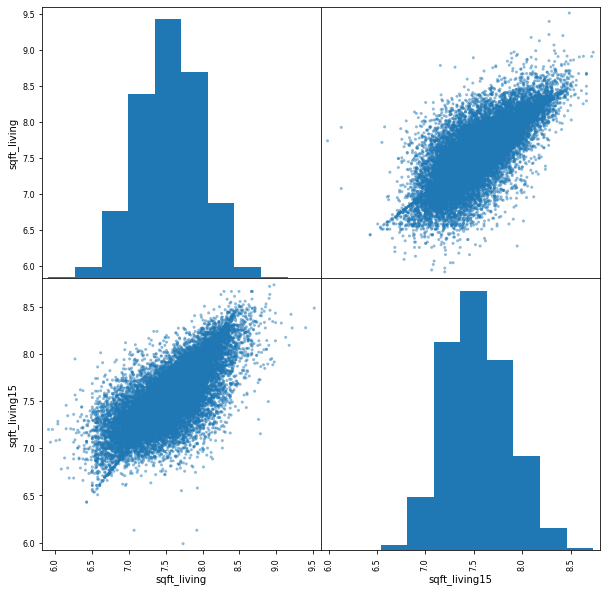

In [202]:
for each in xcols:
    kc[each] = kc[each].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(kc[xcols], figsize=(10,10))

In [203]:
outcome = 'price'
xcols = ['sqft_living', 'sqft_living15']
predictors = '+'.join(xcols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=kc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     6944.
Date:                Sat, 13 Mar 2021   Prob (F-statistic):               0.00
Time:                        01:32:25   Log-Likelihood:            -3.0203e+05
No. Observations:               21597   AIC:                         6.041e+05
Df Residuals:                   21594   BIC:                         6.041e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.163e+06    4.5e+04    -92.551      0.000   -4.25e+06   -4.07e+06
sqft_living    4.028e+05   6913.630     58.262      0.000    3.89e+05    4.16e+05
sqft_living15  2.204e+05   8955.705     24.611      0.000    2.03e+05    2.38e+05
==============================================================================
Omnibus:                    19864.005   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1902944.176
Skew:                           4.103   Prob(JB):                         0.00
Kurtosis:                      48.248   Cond. No.                         249.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""